## Convex Optimization Project 
### implementation of the linear and nonlinear gradient conjugate method

#### Kiarash Joolaie - 400100949
#### Kooshan Fattah - 401102191
#### Mazdak Teymorian - 401101495

In [2]:
import numpy as np

In [3]:
def f(x): # Define the objective function
    return x[0]**2/2 + x[0]*x[1] + x[1]**2 - 2*x[1]
A = np.array(([1/2, 1/2], [1/2, 1]), dtype=float)
b = np.array([0., 2.])
eigs = np.linalg.eigvals(A)
print("The eigenvalues of A:", eigs)

The eigenvalues of A: [0.19098301 1.30901699]


In [4]:
if (np.all(eigs>0)):
    print("A is positive definite")
elif (np.all(eigs>=0)):
    print("A is positive semi-definite")
else:
    print("A is negative definite")

A is positive definite


In [5]:
if (A.T==A).all()==True: print("A is symmetric")

A is symmetric


In [6]:
def linear_CG(x, A, b, epsilon):
    res = A.dot(x) - b # Initialize the residual
    delta = -res # Initialize the descent direction
    
    while True:
        
        if np.linalg.norm(res) <= epsilon:
            return x, f(x) # Return the minimizer x* and the function value f(x*)
        
        D = A.dot(delta)
        beta = -(res.dot(delta))/(delta.dot(D)) # Line (11) in the algorithm
        x = x + beta*delta # Generate the new iterate

        res = A.dot(x) - b # generate the new residual
        chi = res.dot(D)/(delta.dot(D)) # Line (14) in the algorithm 
        delta = chi*delta -  res # Generate the new descent direction

In [ ]:
linear_CG(np.array([2.3, -2.2]), A, b, 10**-5)

## Comparison with Steepest descent
Now we write two functions; one for the linear conjugate gradient and the other for the steepest descent and we will see that for a matrix of size 100*100 the CG method converges much faster.

In [8]:
def conjugate_gradient(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0
    r = b - A @ x
    p = r
    rs_old = r.T @ r
    steps = 0

    for i in range(max_iter):
        Ap = A @ p
        alpha = rs_old / (p.T @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rs_new = r.T @ r
        steps += 1

        if np.sqrt(rs_new) < tol:
            break

        beta = rs_new / rs_old
        p = r + beta * p
        rs_old = rs_new

    return x, steps

# Generate A and b
n = 100
A = 2 * np.eye(n) - np.eye(n, k=1) - np.eye(n, k=-1)
b = np.ones(n)
x0 = np.zeros(n)

# Solve using Conjugate Gradient
x_cg, steps_cg = conjugate_gradient(A, b, x0)
print(f"Conjugate Gradient converged in {steps_cg} steps.")

Conjugate Gradient converged in 50 steps.


In [10]:
def steepest_descent(A, b, x0, tol=1e-6, max_iter=1000):
    x = x0
    r = b - A @ x
    steps = 0

    for i in range(max_iter):
        Ar = A @ r
        alpha = (r.T @ r) / (r.T @ Ar)
        x = x + alpha * r
        r = r - alpha * Ar
        steps += 1

        if np.linalg.norm(r) < tol:
            break

    return x, steps

# Solve using Steepest Descent
x_sd, steps_sd = steepest_descent(A, b, x0)
print(f"Steepest Descent converged in {steps_sd} steps.")

Steepest Descent converged in 1000 steps.


The Conjugate Gradient method converges faster because it uses conjugate directions to ensure that each step is optimal and does not interfere with previous steps. In contrast, the Steepest Descent method follows the direction of the gradient at each step, which can lead to slow convergence, especially for ill-conditioned matrices.

The number of steps required for convergence is a key metric for comparing the efficiency of iterative methods. In this example, the CG method requires fewer steps to achieve the same level of accuracy, making it a more powerful tool for solving large linear systems.

Minimum found at [ 8.99100899 -0.08991009] in 1 steps.
Function value at minimum: 80.91908091908093


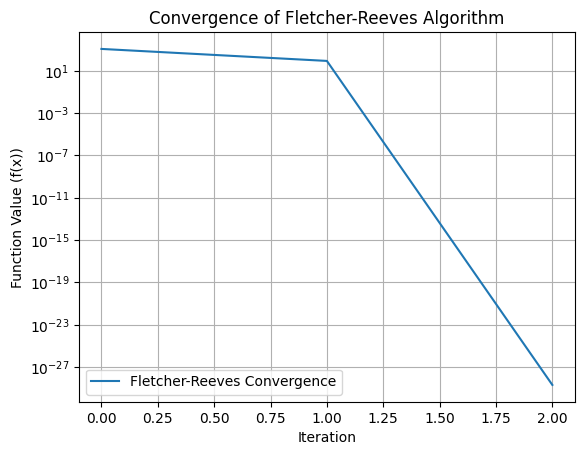

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

# Define the objective function and its gradient
def f(x):
    return x[0]**2 + 10 * x[1]**2  # Example: f(x) = x1^2 + 10*x2^2

def grad_f(x):
    return np.array([2 * x[0], 20 * x[1]])

# Fletcher-Reeves Algorithm
def fletcher_reeves(f, grad_f, x0, max_iter=1000, tol=1e-6):
    x = x0
    g = grad_f(x)
    d = -g  # Initial search direction
    steps = 0
    x_history = [x]  # Store the history of x for plotting
    f_history = [f(x)]  # Store the history of function values

    for k in range(max_iter):
        # Perform line search to find the step size alpha
        line_search_result = line_search(f, grad_f, x, d)
        if line_search_result[0] is not None:
            alpha = line_search_result[0]  # Extract step size from line search
        else:
            alpha = 1.0  # Fallback if line search fails

        # Update x
        x_new = x + alpha * d
        g_new = grad_f(x_new)

        # Store history
        x_history.append(x_new)
        f_history.append(f(x_new))

        # Check for convergence
        if np.linalg.norm(g_new) < tol:
            break

        # Compute beta (Fletcher-Reeves)
        beta = np.dot(g_new, g_new) / np.dot(g, g)

        # Update search direction
        d = -g_new + beta * d

        # Update for next iteration
        x = x_new
        g = g_new
        steps += 1

    return x, steps, x_history, f_history

# Initial guess
x0 = np.array([10.0, 10.0])

# Run Fletcher-Reeves algorithm
x_min, steps, x_history, f_history = fletcher_reeves(f, grad_f, x0)

# Print results
print(f"Minimum found at {x_min} in {steps} steps.")
print(f"Function value at minimum: {f(x_min)}")

# Plot convergence
plt.plot(f_history, label="Fletcher-Reeves Convergence")
plt.xlabel("Iteration")
plt.ylabel("Function Value (f(x))")
plt.title("Convergence of Fletcher-Reeves Algorithm")
plt.yscale("log")  # Use log scale for better visualization
plt.legend()
plt.grid()
plt.show()

Fletcher-Reeves: Minimum found at [0.0000000e+00 8.8817842e-15] in 1 steps.
Polak-Ribière: Minimum found at [0.0000000e+00 8.8817842e-15] in 1 steps.
Steepest Descent: Minimum found at [ 4.00093993e-08 -1.48291342e-10] in 35 steps.


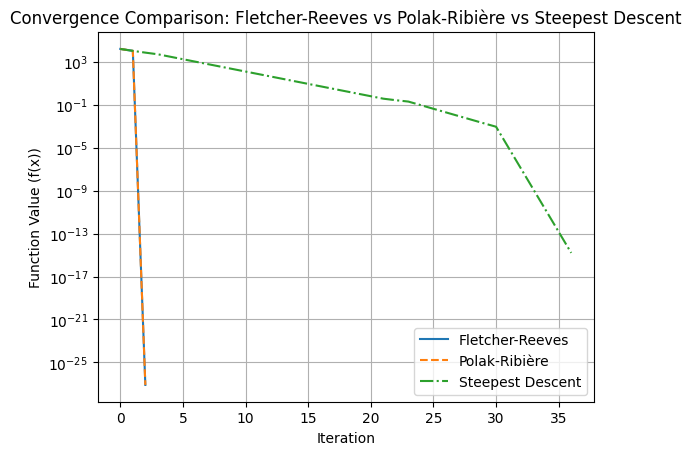

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

# Define the objective function and its gradient
def f(x):
    return x[0]**2 + 10 * x[1]**2  # Example: f(x) = x1^2 + 10*x2^2

def grad_f(x):
    return np.array([2 * x[0], 20 * x[1]])

# Polak-Ribière Conjugate Gradient Algorithm
def polak_ribiere(f, grad_f, x0, max_iter=1000, tol=1e-6):
    x = x0
    g = grad_f(x)
    d = -g  # Initial search direction
    steps = 0
    f_history = [f(x)]  # Store the history of function values

    for k in range(max_iter):
        # Perform line search to find the step size alpha
        line_search_result = line_search(f, grad_f, x, d)
        if line_search_result[0] is not None:
            alpha = line_search_result[0]  # Extract step size from line search
        else:
            alpha = 1.0  # Fallback if line search fails

        # Update x
        x = x + alpha * d
        g_new = grad_f(x)

        # Store history
        f_history.append(f(x))

        # Check for convergence
        if np.linalg.norm(g_new) < tol:
            break

        # Compute beta (Polak-Ribière)
        beta = np.dot(g_new, g_new - g) / np.dot(g, g)

        # Update search direction
        d = -g_new + beta * d

        # Update for next iteration
        g = g_new
        steps += 1

    return x, steps, f_history

# Steepest Descent Algorithm
def steepest_descent(f, grad_f, x0, max_iter=1000, tol=1e-6):
    x = x0
    g = grad_f(x)
    steps = 0
    f_history = [f(x)]

    for k in range(max_iter):
        # Perform line search to find the step size alpha
        line_search_result = line_search(f, grad_f, x, -g)
        if line_search_result[0] is not None:
            alpha = line_search_result[0]  # Extract step size from line search
        else:
            alpha = 1.0  # Fallback if line search fails

        # Update x
        x = x - alpha * g
        g = grad_f(x)

        # Store history
        f_history.append(f(x))
        if np.linalg.norm(g) < tol:
            break

        steps += 1

    return x, steps, f_history

# Initial guess
x0 = np.array([124.0, 10.0])

# Run all algorithms
x_min_fr, steps_fr, f_history_fr = fletcher_reeves(f, grad_f, x0)
x_min_pr, steps_pr, f_history_pr = polak_ribiere(f, grad_f, x0)
x_min_sd, steps_sd, f_history_sd = steepest_descent(f, grad_f, x0)

# Print results
print(f"Fletcher-Reeves: Minimum found at {x_min_fr} in {steps_fr} steps.")
print(f"Polak-Ribière: Minimum found at {x_min_pr} in {steps_pr} steps.")
print(f"Steepest Descent: Minimum found at {x_min_sd} in {steps_sd} steps.")

# Plot convergence comparison
plt.plot(f_history_fr, label="Fletcher-Reeves")
plt.plot(f_history_pr, label="Polak-Ribière", linestyle="--")
plt.plot(f_history_sd, label="Steepest Descent", linestyle="-.")
plt.xlabel("Iteration")
plt.ylabel("Function Value (f(x))")
plt.title("Convergence Comparison: Fletcher-Reeves vs Polak-Ribière vs Steepest Descent")
plt.yscale("log")  # Use log scale for better visualization
plt.legend()
plt.grid()
plt.show()

## Key Observations
1. Fletcher-Reeves:
- Converges faster than Steepest Descent due to the use of conjugate directions.
- Requires fewer iterations to reach the minimum.
2. Polak-Ribière:
- Often converges faster than Fletcher-Reeves for non-quadratic functions.
- Performs better in cases where the objective function is not perfectly quadratic.
3. Steepest Descent:
- Follows the gradient direction at each step, which can lead to slower convergence, especially for ill-conditioned problems.
This comparison demonstrates the efficiency of the Fletcher-Reeves algorithm and its variants compared to Steepest Descent, while still avoiding Hessian computation.


## Example: Training a Model

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Create a toy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.long), torch.tensor(y_test, dtype=torch.long)

# Step 2: Define the simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


c:\Users\Mazdak\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Step 3: Gradient Descent Training
print("Training with Gradient Descent...")
model_gd = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer_gd = optim.SGD(model_gd.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    model_gd.train()
    optimizer_gd.zero_grad()
    outputs = model_gd(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer_gd.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate Gradient Descent Model
model_gd.eval()
with torch.no_grad():
    preds_gd = torch.argmax(model_gd(X_test), axis=1).numpy()
    accuracy_gd = accuracy_score(y_test, preds_gd)
print(f"Gradient Descent Test Accuracy: {accuracy_gd:.4f}")

Training with Gradient Descent...
Epoch [10/50], Loss: 0.7281
Epoch [20/50], Loss: 0.6968
Epoch [30/50], Loss: 0.6694
Epoch [40/50], Loss: 0.6451
Epoch [50/50], Loss: 0.6233
Gradient Descent Test Accuracy: 0.6600


In [3]:
# Step 4: Conjugate Gradient Training
print("\nTraining with Conjugate Gradient...")
model_cg = SimpleNet()

# Function for Conjugate Gradient optimization
def conjugate_gradient(X, y, model, criterion, max_iter=10):
    params = list(model.parameters())
    with torch.no_grad():
        for param in params:
            if param.requires_grad:
                param.grad = None

    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()

    grads = []
    for param in params:
        if param.grad is not None:
            grads.append(param.grad.view(-1))
    grads = torch.cat(grads)

    direction = -grads
    for i in range(max_iter):
        # Line search
        alpha = 0.01  # Fixed step size for simplicity

        # Update parameters
        idx = 0
        for param in params:
            if param.requires_grad:
                numel = param.numel()
                param.data += alpha * direction[idx: idx + numel].view_as(param.data)
                idx += numel

        # Compute new gradients
        with torch.no_grad():
            for param in params:
                if param.requires_grad:
                    param.grad = None

        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()

        grads_new = []
        for param in params:
            if param.grad is not None:
                grads_new.append(param.grad.view(-1))
        grads_new = torch.cat(grads_new)

        # Update direction using Polak-Ribiere formula
        beta = torch.dot(grads_new, grads_new - grads) / torch.dot(grads, grads)
        direction = -grads_new + beta * direction

        grads = grads_new

for epoch in range(epochs):
    model_cg.train()
    conjugate_gradient(X_train, y_train, model_cg, criterion, max_iter=10)
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            outputs = model_cg(X_train)
            loss = criterion(outputs, y_train)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate Conjugate Gradient Model
model_cg.eval()
with torch.no_grad():
    preds_cg = torch.argmax(model_cg(X_test), axis=1).numpy()
    accuracy_cg = accuracy_score(y_test, preds_cg)
print(f"Conjugate Gradient Test Accuracy: {accuracy_cg:.4f}")


Training with Conjugate Gradient...
Epoch [10/50], Loss: 0.5266
Epoch [20/50], Loss: 0.4499
Epoch [30/50], Loss: 0.4036
Epoch [40/50], Loss: 0.3737
Epoch [50/50], Loss: 0.3532
Conjugate Gradient Test Accuracy: 0.8150


As you can see we achieved a better accuracy with Conjugate Gradient Method then Gradient Decent Method.